In [2]:
##Formulate/ Outline the problem
# The problem is to predict the number of sunshine hours for BASEL for a given date 
# in the future

## Identify inputs and outputs

import pandas as pd

url = 'https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1'
#filename_data = "weather_prediction_dataset_light.csv"
data = pd.read_csv(url)
#data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [3]:
data.columns


Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'DE_BILT_cloud_cover', 'DE_BILT_humidity', 'DE_BILT_pressure',
       'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine',
       'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max',
       'DRESDEN_cloud_cover', 'DRESDEN_humidity', 'DRESDEN_global_radiation',
       'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean',
       'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_humidity', 'DUSSELDORF_pressure',
       'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min',
       'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATH

In [4]:
## Identify inputs and outputs
# Inputs = All columns of the dataset
# Outputs = Number of sunshine hours

## Prepare data
# We will take the first 3 years of data due to computational limitations
nr_rows = 365*3
X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])

# # Show this after optimization, show them good data makes for better models
# feats = ['BASEL_cloud_cover', 'BASEL_humidity',
#        'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
#        'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']
# X_data = X_data[feats]

# labels (sunshine hours the next day)
y_data = data.loc[1:(nr_rows + 1)]["BASEL_sunshine"]

print(X_data.shape[1])
X_data

89


,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,8,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,7,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,3,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,7,0.82,1.0020,0.36,0.00,1.0,8.2,6.7,10.4,8,...,-5.9,-6.8,-5.0,0.88,0.9945,0.09,0.32,11.0,8.2,13.9
1092,8,0.90,1.0041,0.10,0.26,0.0,7.3,5.2,9.3,8,...,-6.4,-7.1,-5.7,0.92,1.0072,0.26,0.40,8.3,6.0,10.6
1093,8,0.79,1.0126,0.16,0.17,0.0,7.8,6.1,13.0,8,...,-9.6,-12.2,-7.0,0.94,1.0107,0.10,0.28,10.5,8.2,12.8
1094,8,0.65,1.0077,0.15,0.00,0.0,12.5,9.7,14.7,8,...,-6.3,-8.5,-4.0,0.88,1.0069,0.34,0.18,11.4,9.6,13.1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, 
                                                          y_data, 
                                                          test_size=0.3, 
                                                          random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, 
                                                y_holdout, 
                                                test_size=0.5, 
                                                random_state=0)


In [ ]:
## Choose a loss function and optimizer
# Define model
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def create_nn():
    # Input layer
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')

    # Dense layers
    layers_dense = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    # Output layer
    outputs = keras.layers.Dense(1, name="output")(layers_dense)

    return keras.Model(inputs=inputs, outputs=outputs, name="weather_prediction_model")

model = create_nn()
model.summary()

Model: "weather_prediction_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 89)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         9,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,101 (55.08 KB)

 Trainable params: 14,101 (55.08 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Choose loss and optimizer
model.compile(optimizer='adam',
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])

In [8]:
## Compile and Train the model
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    verbose=2)

Epoch 1/200
24/24 - 1s - 31ms/step - loss: 28.7501 - root_mean_squared_error: 5.3619
Epoch 2/200
24/24 - 0s - 3ms/step - loss: 15.1446 - root_mean_squared_error: 3.8916
Epoch 3/200
24/24 - 0s - 3ms/step - loss: 13.5208 - root_mean_squared_error: 3.6771
Epoch 4/200
24/24 - 0s - 3ms/step - loss: 12.7711 - root_mean_squared_error: 3.5737
Epoch 5/200
24/24 - 0s - 3ms/step - loss: 12.2128 - root_mean_squared_error: 3.4947
Epoch 6/200
24/24 - 0s - 3ms/step - loss: 11.7660 - root_mean_squared_error: 3.4302
Epoch 7/200
24/24 - 0s - 3ms/step - loss: 11.3509 - root_mean_squared_error: 3.3691
Epoch 8/200
24/24 - 0s - 3ms/step - loss: 11.0331 - root_mean_squared_error: 3.3216
Epoch 9/200
24/24 - 0s - 3ms/step - loss: 10.8730 - root_mean_squared_error: 3.2974
Epoch 10/200
24/24 - 0s - 3ms/step - loss: 10.6372 - root_mean_squared_error: 3.2615
Epoch 11/200
24/24 - 0s - 3ms/step - loss: 10.4844 - root_mean_squared_error: 3.2380
Epoch 12/200
24/24 - 0s - 3ms/step - loss: 10.3502 - root_mean_squared_er

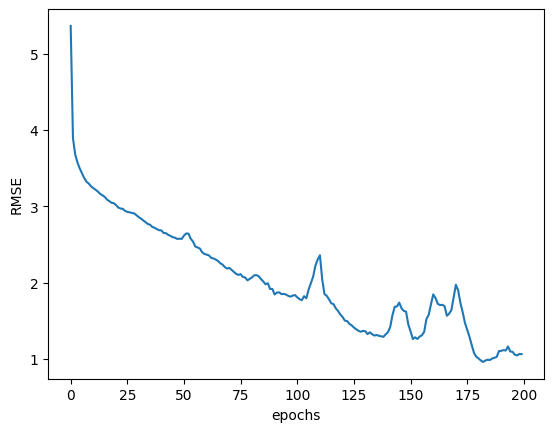

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_history(metrics):
    """
    Plot the training history

    Args:
        metrics(str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")

plot_history('root_mean_squared_error')


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


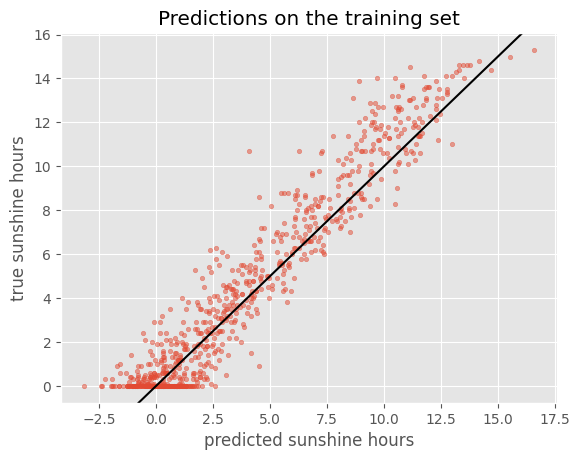

In [10]:
## Perform a Prediction/Classification
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# We define a function that we will reuse in this lesson
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot')  # optional, that's only to define a visual style
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.axline((0,0),slope = 1, color = "black") # plot diagonal reference line
    plt.xlabel("predicted sunshine hours")
    plt.ylabel("true sunshine hours")
    plt.title(title)

plot_predictions(y_train_predicted, y_train, 
                 title='Predictions on the training set')


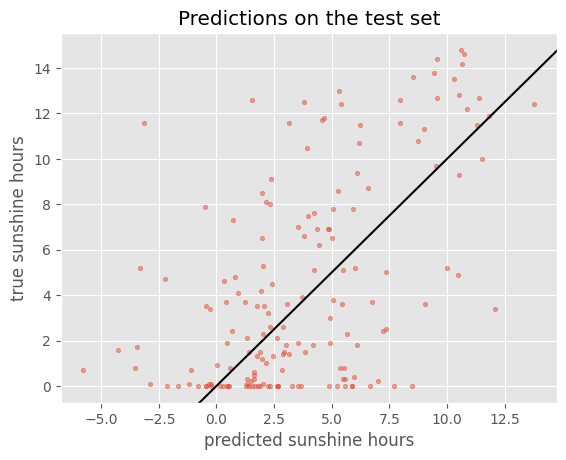

In [11]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')

In [12]:
## Measure Performance
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8599 - root_mean_squared_error: 1.3638  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1106 - root_mean_squared_error: 4.0138 
Train RMSE: 1.36, Test RMSE: 4.01


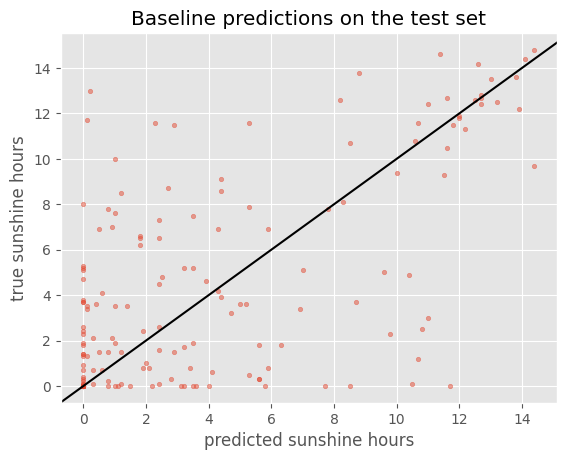

In [13]:
y_baseline_prediction = X_test['BASEL_sunshine']
plot_predictions(y_baseline_prediction, y_test, title='Baseline predictions on the test set')


In [14]:
from sklearn.metrics import root_mean_squared_error
#from keras.metrics import RootMeanSquaredError
rmse_baseline = root_mean_squared_error(y_test, y_baseline_prediction) #squared = False -> RMSE, True -> MSE
# rmse_2 =  RootMeanSquaredError() #y_test, y_baseline_prediction)
# rmse_2.update_state(y_test, y_baseline_prediction)
print('RMSE Baseline:', rmse_baseline)
#print('Keras RMSE Baseline:', rmse_2.result().numpy())
print('Neural network: ', test_metrics['root_mean_squared_error'])


RMSE Baseline: 3.877323350410224
Neural network:  4.013796329498291


In [15]:
model = create_nn()
compile_model(model)


In [16]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val))


Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 14.1287 - root_mean_squared_error: 3.7588 - val_loss: 13.4842 - val_root_mean_squared_error: 3.6721
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0282 - root_mean_squared_error: 3.4682 - val_loss: 14.1635 - val_root_mean_squared_error: 3.7634
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8013 - root_mean_squared_error: 3.4353 - val_loss: 13.5480 - val_root_mean_squared_error: 3.6808
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7942 - root_mean_squared_error: 3.4343 - val_loss: 12.4329 - val_root_mean_squared_error: 3.5260
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7249 - root_mean_squared_error: 3.4242 - val_loss: 11.2080 - val_root_mean_squared_error: 3.3478
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9876 - root_mean_squared_error: 3.3148 - val_loss: 11.2206 - val_root_mean_squared_error: 3.3497
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

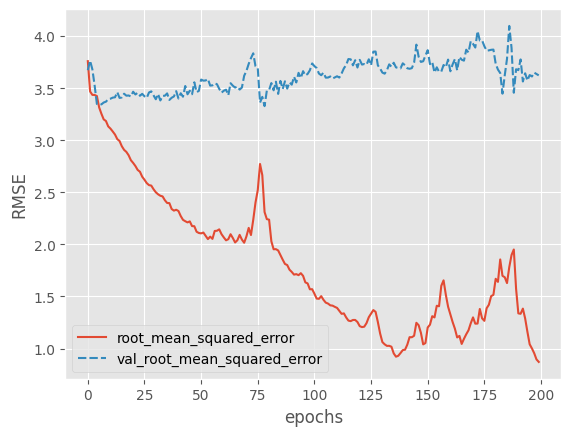

In [17]:
plot_history(['root_mean_squared_error', 
              'val_root_mean_squared_error'])


In [18]:
## Tune Hyperparameters
model = create_nn()
compile_model(model)

from keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10
    )

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])


Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 19.1091 - root_mean_squared_error: 4.3714 - val_loss: 13.1335 - val_root_mean_squared_error: 3.6240
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.2164 - root_mean_squared_error: 3.7705 - val_loss: 11.7753 - val_root_mean_squared_error: 3.4315
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9586 - root_mean_squared_error: 3.5998 - val_loss: 11.7165 - val_root_mean_squared_error: 3.4229
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4757 - root_mean_squared_error: 3.5321 - val_loss: 11.5855 - val_root_mean_squared_error: 3.4038
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.2219 - root_mean_squared_error: 3.4960 - val_loss: 11.1260 - val_root_mean_squared_error: 3.3356
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.6886 - root_mean_squared_error: 3.4189 - val_loss: 11.1303 - val_root_mean_squared_error: 3.3362
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

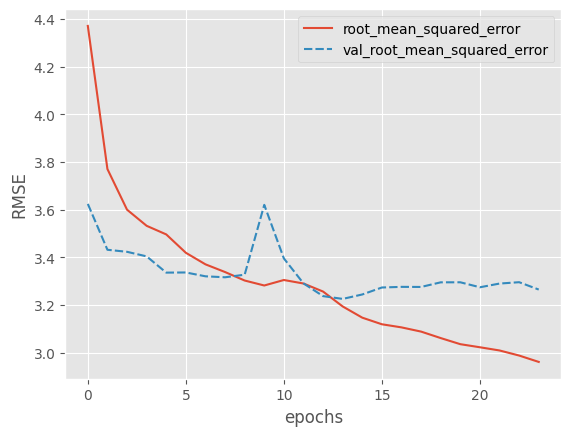

In [19]:
plot_history(['root_mean_squared_error', 
              'val_root_mean_squared_error'])


In [ ]:
def create_nn():
    # Input layer
    inputs = keras.layers.Input(shape=(X_data.shape[1],), name='input')

    # Dense layers
    layers_dense = keras.layers.BatchNormalization()(inputs)
    layers_dense = keras.layers.Dense(100, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)
    
    #### Show after the initial run
    # layers_dense4 = keras.layers.Dense(25, 'relu')(layers_dense3)
    # layers_dense5 = keras.layers.Dense(5, 'relu')(layers_dense4)

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)

    # Defining the model and compiling it
    return keras.Model(inputs=inputs, outputs=outputs, name="model_batchnorm")

model = create_nn()
compile_model(model)
model.summary()


Model: "model_batchnorm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 89)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 89)             │           356 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         9,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,457 (36.94 KB)

 Trainable params: 9,279 (36.25 KB)

 Non-trainable params: 178 (712.00 B)

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 23.0621 - root_mean_squared_error: 4.8023 - val_loss: 135.9416 - val_root_mean_squared_error: 11.6594
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.4320 - root_mean_squared_error: 3.9284 - val_loss: 54.5543 - val_root_mean_squared_error: 7.3861
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3484 - root_mean_squared_error: 3.6535 - val_loss: 35.6941 - val_root_mean_squared_error: 5.9745
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9855 - root_mean_squared_error: 3.4620 - val_loss: 25.6411 - val_root_mean_squared_error: 5.0637
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1591 - root_mean_squared_error: 3.3405 - val_loss: 19.9541 - val_root_mean_squared_error: 4.4670
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6171 - root_mean_squared_error: 3.2584 - val_loss: 16.4151 - val_root_mean_squared_error: 4.0516
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━

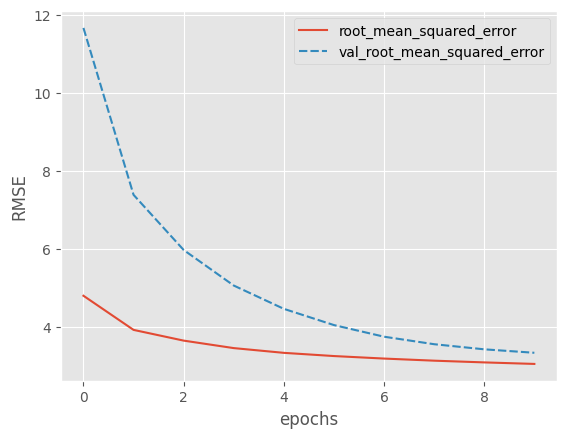

In [21]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])

plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Baseline: 3.877323350410224
Optimized: 3.1764347151985204


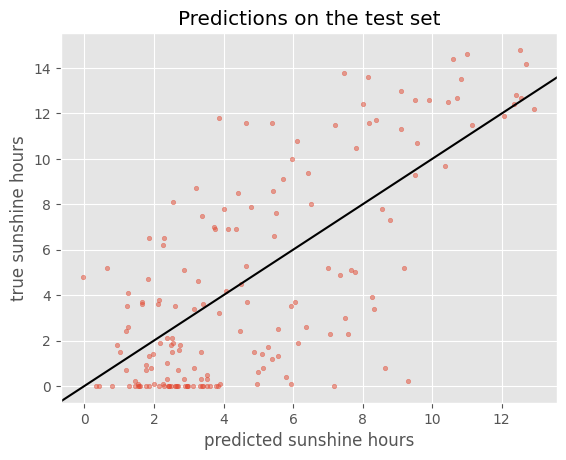

In [22]:
y_test_predicted = model.predict(X_test)
plot_predictions(y_test_predicted, y_test, 
                 title='Predictions on the test set')

rmse_opt = root_mean_squared_error(y_test, y_test_predicted)
rmse_baseline = root_mean_squared_error(y_test, y_baseline_prediction)
print('Baseline:', rmse_baseline)
print('Optimized:', rmse_opt)

In [23]:
## Not part of course, Just to show DL vs ML
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Define our model
# extra parameter called n_estimators which is number of trees in the forest
# a leaf is a class label at the end of the decision tree
forest = RandomForestRegressor(n_estimators=100, 
                               max_depth=7, 
                               min_samples_leaf=1) 

# train our model
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)

rmse_forest = root_mean_squared_error(y_test, forest_preds)
print("Forest RMSE: ", rmse_forest)

rmse_dl = root_mean_squared_error(y_test, y_test_predicted)
print("DL RMSE: ", rmse_dl)

Forest RMSE:  3.1401127080664852
DL RMSE:  3.1764347151985204


In [24]:
from keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # You can adjust this to add a more meaningful model name
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback],
                    verbose = 2)

##Share/Deploy Model
model.save("tuned_model.keras")

### Now show that good data can improve model performance 
## by limiting the data being fed into the model.

Epoch 1/200


KeyboardInterrupt: 

Epoch 1/200
24/24 - 1s - 26ms/step - loss: 38.7237 - root_mean_squared_error: 6.2228 - val_loss: 35.5098 - val_root_mean_squared_error: 5.9590
Epoch 2/200
24/24 - 0s - 5ms/step - loss: 32.3814 - root_mean_squared_error: 5.6905 - val_loss: 27.5160 - val_root_mean_squared_error: 5.2456
Epoch 3/200
24/24 - 0s - 5ms/step - loss: 26.2942 - root_mean_squared_error: 5.1278 - val_loss: 21.5830 - val_root_mean_squared_error: 4.6457
Epoch 4/200
24/24 - 0s - 5ms/step - loss: 20.6889 - root_mean_squared_error: 4.5485 - val_loss: 16.6923 - val_root_mean_squared_error: 4.0856
Epoch 5/200
24/24 - 0s - 5ms/step - loss: 16.6490 - root_mean_squared_error: 4.0803 - val_loss: 13.5952 - val_root_mean_squared_error: 3.6872
Epoch 6/200
24/24 - 0s - 5ms/step - loss: 14.7133 - root_mean_squared_error: 3.8358 - val_loss: 12.3885 - val_root_mean_squared_error: 3.5197
Epoch 7/200
24/24 - 0s - 5ms/step - loss: 14.0210 - root_mean_squared_error: 3.7445 - val_loss: 12.0809 - val_root_mean_squared_error: 3.4758
Epoch

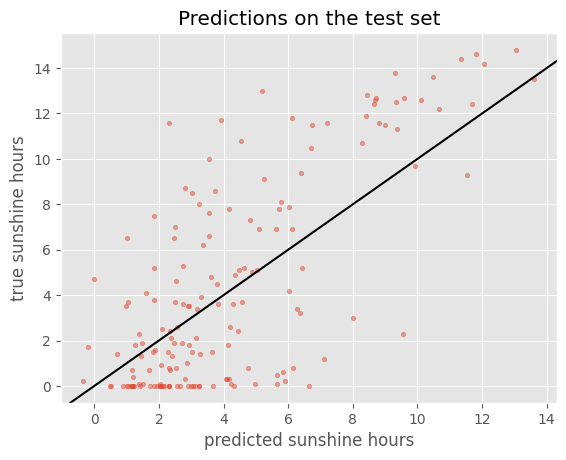

In [ ]:
X_train = X_train[['BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation']]
X_val = X_val[['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation']]
X_test = X_test[['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation']]

from keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # You can adjust this to add a more meaningful model name
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

def create_nn():
    # Input layer
    inputs = keras.layers.Input(shape=(X_train.shape[1],), name='input')

    # Dense layers
    layers_dense1 = keras.layers.BatchNormalization()(inputs)
    layers_dense2 = keras.layers.Dense(100, 'relu')(layers_dense1)
    layers_dense3 = keras.layers.Dense(50, 'relu')(layers_dense2)
    
    #### Show after the initial run
    # layers_dense4 = keras.layers.Dense(25, 'relu')(layers_dense3)
    # layers_dense5 = keras.layers.Dense(5, 'relu')(layers_dense4)

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense2)

    # Defining the model and compiling it
    return keras.Model(inputs=inputs, outputs=outputs, name="model_batchnorm")

model = create_nn()

model = create_nn()
compile_model(model)

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback],
                    verbose = 2)

y_test_predicted = model.predict(X_test)
plot_predictions(y_test_predicted, y_test, 
                 title='Predictions on the test set')

rmse_opt = root_mean_squared_error(y_test, y_test_predicted)
print('\n\n\n\n Optimized:', rmse_opt)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 30408), started 4:29:44 ago. (Use '!kill 30408' to kill it.)

In [ ]:
# Model saving
model.save('my_tuned_weather_model.keras')